In [1]:
from matplotlib import pyplot as plt 
import numpy as np  
%matplotlib inline

In [2]:
import sys
sys.path.append('../lib')
from simlib import *

In [18]:
k, b = np.random.uniform(0.1, 3.0, size=2)
U = harmonic_potential(k=k)
k, b

(1.398876296107846, 0.20032845735893309)

In [19]:
ts1, xs1, hist1, bin_edges1 = simulate('test1_lang', U, max_t=100000, KT=1/b, method='langevin')
ts2, xs2, hist2, bin_edges2 = simulate('test1_smol', U, max_t=100000, KT=1/b, method='smol')

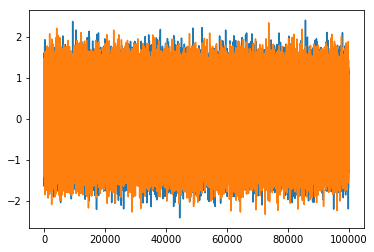

In [60]:
plt.plot(ts1, xs1)
plt.plot(ts2, xs2)

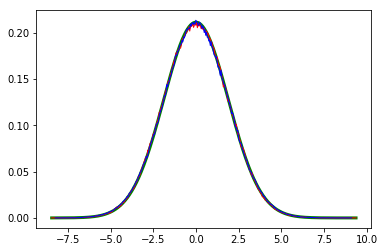

In [20]:
def f(x, k, b):
    return np.exp(-b*k*x**2/2) / np.sqrt(2*np.pi/(k*b))
plt.plot(bin_edges1[:-1], f(bin_edges1[:-1], k, b), linewidth=3, color='green')
plt.plot(bin_edges1[:-1], hist1, linewidth=1, color='red')
plt.plot(bin_edges2[:-1], hist2, linewidth=1, color='blue')

In [41]:
mu = 5
gs = [gaussian(-mu), gaussian(mu), gaussian()]
V = gaussian_potential(gs)

def gauss(x, m=0, s=1):
    return 1/(np.sqrt(2*np.pi)*s) * np.exp(-(x-m)**2/(2*s**2))

def f(x, m, s=1):
    return 1/3 * (gauss(x, mu) + gauss(x, -mu) + gauss(x))

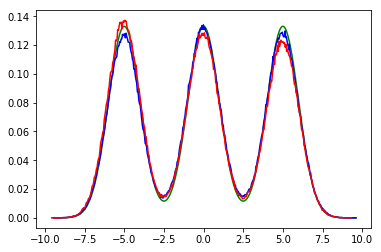

In [43]:
ts3, xs3, hist3, bin_edges3 = simulate('test2_lang', V, max_t=100000, method='lang')
ts4, xs4, hist4, bin_edges4 = simulate('test2_smol', V, max_t=100000, method='smol')
plt.plot(bin_edges3[:-1], f(bin_edges3[:-1], mu), color='green')
plt.plot(bin_edges3[:-1], hist3, color='blue')
plt.plot(bin_edges4[:-1], hist4, color='red')

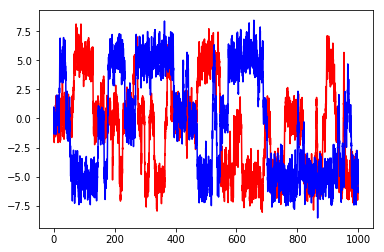

In [53]:
a = 0
b = 10000
plt.plot(ts3[a:b], xs3[a:b], color='red')
plt.plot(ts4[a:b], xs4[a:b], color='blue')